<a href="https://colab.research.google.com/github/Locke0/Text-Summarizer/blob/main/Text_Summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports


In [73]:
#imports

from nltk.cluster.util import cosine_distance
from nltk.tokenize import word_tokenize

import numpy as np
import networkx as nx
# loading data
import requests


#Helpful Links

https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

##Testing Text

In [74]:
text = '''Of late years numerous studies have been published on the conception
of matter, especially by physicists, chemists, and mathematicians.
Among these recent contributions to science I will quote the articles
of Duhem on the Evolution of Mechanics published in 1903 in the _Revue
générale des Sciences_, and other articles by the same author, in
1904, in the _Revue de Philosophie_. Duhem's views have attracted much
attention, and have dealt a serious blow at the whole theory of the
mechanics of matter. Let me also quote that excellent work of Dastre,
_La Vie et la Mort_, wherein the author makes so interesting an
application to biology of the new theories on energetics; the
discussion between Ostwald and Brillouin on matter, in which two rival
conceptions find themselves engaged in a veritable hand-to-hand
struggle (_Revue générale des Sciences_, Nov. and Dec. 1895); the
curious work of Dantec on _les Lois Naturelles_, in which the author
ingeniously points out the different sensorial districts into which
science is divided, although, through a defect in logic, he accepts
mechanics as the final explanation of things. And last, it is
impossible to pass over, in silence, the rare works of Lord Kelvin, so
full, for French readers, of unexpected suggestions, for they show us
the entirely practical and empirical value which the English attach to
mechanical models.

My object is not to go through these great studies in detail. It is
the part of mathematical and physical philosophers to develop their
ideas on the inmost nature of matter, while seeking to establish
theories capable of giving a satisfactory explanation of physical
phenomena. This is the point of view they take up by preference, and
no doubt they are right in so doing. The proper rôle of the natural
sciences is to look at phenomena taken by themselves and apart from
the observer.

My own intention, in setting forth these same theories on matter, is
to give prominence to a totally different point of view. Instead of
considering physical phenomena in themselves, we shall seek to know
what idea one ought to form of their nature when one takes into
account that they are observed phenomena. While the physicist
withdraws from consideration the part of the observer in the
verification of physical phenomena, our rôle is to renounce this
abstraction, to re-establish things in their original complexity, and
to ascertain in what the conception of matter consists when it is
borne in mind that all material phenomena are known only in their
relation to ourselves, to our bodies, our nerves, and our
intelligence.
'''

# Data Processing


# Loading and Cleaning Data
https://towardsdatascience.com/nlp-building-text-cleanup-and-preprocessing-pipeline-eba4095245a0


In [75]:
# text: https://www.gutenberg.org/cache/epub/21077/pg21077.txt
# request tutorial: https://www.youtube.com/watch?v=mKP7ChzJBqg

# loading books
def get_text(url):
  result = requests.get(url)
  result.encoding = result.apparent_encoding
  
  return result.text
# text = get_text('https://www.gutenberg.org/cache/epub/21077/pg21077.txt')

## Remove HTML Tags

In [76]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
  return BeautifulSoup(text, 'html.parser').get_text()

clean_text = remove_html_tags(text)
# clean_text

##Removing Accented Characters

In [77]:
# imports
import unicodedata

# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text
# call function
clean_text = remove_accented_chars(clean_text)
# clean_text

##Expanding Contractions

In [78]:
# imports
!pip install contractions
import contractions

clean_text = contractions.fix(clean_text)
# clean_text

##Removing Special Characters

In [79]:
# imports
import re
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    text = text.replace('-', ' ')
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
    return re.sub(pat, '', text)
 
# call function
clean_text = remove_special_characters(clean_text)
# clean_text
# clean_text

##Removing Numbers

In [80]:
# function to remove numbers
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
# call function
clean_text = remove_numbers(clean_text)
# clean_text

##Removing extra whitespaces and tabs

In [81]:
# function to remove special characters
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()
# call function
clean_text = remove_extra_whitespace_tabs(clean_text)
# clean_text


##Stemming (Not Used in This Project)

In [82]:
# # imports
# from nltk.stem import PorterStemmer
# # function for stemming
# def get_stem(text):
#     stemmer = nltk.porter.PorterStemmer()
#     text = ' '.join([stemmer.stem(word) for word in text.split()])
#     return text
# # call function
# clean_text = get_stem(clean_text)

## Lemmatization (More Accurate Than Stemming)

In [83]:
# imports
import spacy
nlp = spacy.load('en',parse=True,tag=True, entity=True)
# function to remove special characters
def get_lem(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
# call function
clean_text = get_lem(clean_text)
# clean_text

##Removing Stopwords

In [84]:
import nltk
from nltk.tokenize import ToktokTokenizer
nltk.download('stopwords')

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')

# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text
# call function
remove_stopwords(clean_text);

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##Lower Case



In [85]:
clean_text = clean_text.lower()
# clean_text

# Formatting Data

## Generating sentences

In [86]:
# https://stackoverflow.com/questions/44015316/how-to-get-rid-of-punctuation-while-maintaining-url

import string
import re
from string import punctuation

def read_article(text):

  article = text.split('. ')
  sentences = []
  punc_table = {ord(c): None for c in punctuation}

  # Using John Gruber's regex to find the URLs
  gruber = re.compile(r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))""")


  for sentence in article:
    #deleting any character that IS NOT a-z OR A-Z
    # sentences.append(sentence.replace("--|[^0-9a-zA-Z]+", " ").split(" "))
    # if sentence.find('http') == False and sentence.find('www') == False:
    #   sentence = ''.join([c for c in sentence if c not in string.punctuation])

    sentence = ''.join(t if i % 2 else t.translate(punc_table) for (i, t) in enumerate(gruber.split(sentence)))
    sentences.append(sentence.split())
  return sentences

# sentences = read_article(text)
# sentences

##Similarity matrix

In [87]:
def sentence_similarity(sent1, sent2, stopwords=None):
  if stopwords is None:
    stopwords = []

  all_words = list(set(sent1 + sent2))
  
  # create empty vectors 
  vector1 = [0] * len(all_words)
  vector2 = [0] * len(all_words)

  # build the vector for the first sentence
  for w in sent1:
    if w in stopwords:
      continue
    vector1[all_words.index(w)] += 1

  # build the vector for the second sentence
  for w in sent2:
    if w in stopwords:
      continue
    vector2[all_words.index(w)] += 1

  return 1 - cosine_distance(vector1, vector2)

# sentence_similarity(sentences[2], sentences[4], nltk.corpus.stopwords.words('english'))


In [88]:
# https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/
# https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

def build_similarity_matrix(sentences, stop_words):
  # Create an empty similarity matrix
  similarity_matrix = np.zeros((len(sentences), len(sentences)))
  
  for i1 in range(len(sentences)):
       for i2 in range(len(sentences)):
          if i1 == i2: #ignore if both are same sentences
              continue
          similarity_matrix[i1][i2] = sentence_similarity(sentences[i1], sentences[i2], stop_words)
  return similarity_matrix



# Generate Summary Method

In [96]:
import seaborn as sns
import matplotlib.pylab as plt


def generate_summary(text, top_n=5):
  stop_words = nltk.corpus.stopwords.words('english')
  summarize_text = []

  # Step 1 - Read text and tokenize
  # text = get_text(url)
  sentences =  read_article(text);

  # Step 2 - Generate Similarity Matrix across sentences
  sentence_similarity_martix = build_similarity_matrix(sentences, stop_words);
  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(sentence_similarity_martix, linewidth= 2, annot=True)
  plt.show()

  # Step 3 - Rank sentences in similarity matrix
  sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_martix)
  # scores = nx.pagerank(sentence_similarity_graph, max_iter=6000)

  # https://stackoverflow.com/questions/63476389/poweriterationfailedconvergence-poweriterationfailedconvergence-power-i
  scores = nx.pagerank_numpy(sentence_similarity_graph)
  print(scores)
  # Step 4 - Sort the rank and pick top sentences
  ranked_sentence = sorted(((scores[i],s) for i,s in enumerate(sentences)), reverse=True)    
  print("Indexes of top ranked_sentence order are ", ranked_sentence)
  
  for i in range(top_n):
    # print(i)
    # print(ranked_sentence)
    summarize_text.append(" ".join(ranked_sentence[i][1]))
  

  # Step 5 - Output the summarize text
  print("Summarize Text: \n", ". ".join(summarize_text))



##Summarizing


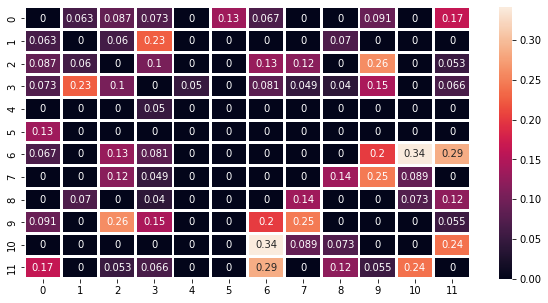

{0: 0.0938370051773092, 1: 0.06027321495710835, 2: 0.09863766795703804, 3: 0.11381661352961985, 4: 0.0183227458710466, 5: 0.028297237004138283, 6: 0.12614014706218143, 7: 0.07962431046394933, 8: 0.05954635045446878, 9: 0.11814602909077254, 10: 0.08732292251116489, 11: 0.11603575592120263}
Indexes of top ranked_sentence order are  [(0.12614014706218143, ['it', 'be', 'the', 'part', 'of', 'mathematical', 'and', 'physical', 'philosopher', 'to', 'develop', 'their', 'idea', 'on', 'the', 'inmost', 'nature', 'of', 'matter', 'while', 'seek', 'to', 'establish', 'theory', 'capable', 'of', 'give', 'a', 'satisfactory', 'explanation', 'of', 'physical', 'phenomenon']), (0.11814602909077254, ['my', 'own', 'intention', 'in', 'set', 'forth', 'these', 'same', 'theory', 'on', 'matter', 'be', 'to', 'give', 'prominence', 'to', 'a', 'totally', 'different', 'point', 'of', 'view']), (0.11603575592120263, ['while', 'the', 'physicist', 'withdraw', 'from', 'consideration', 'the', 'part', 'of', 'the', 'observer', 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.


In [97]:
generate_summary(clean_text, top_n=3)

## Visualizations

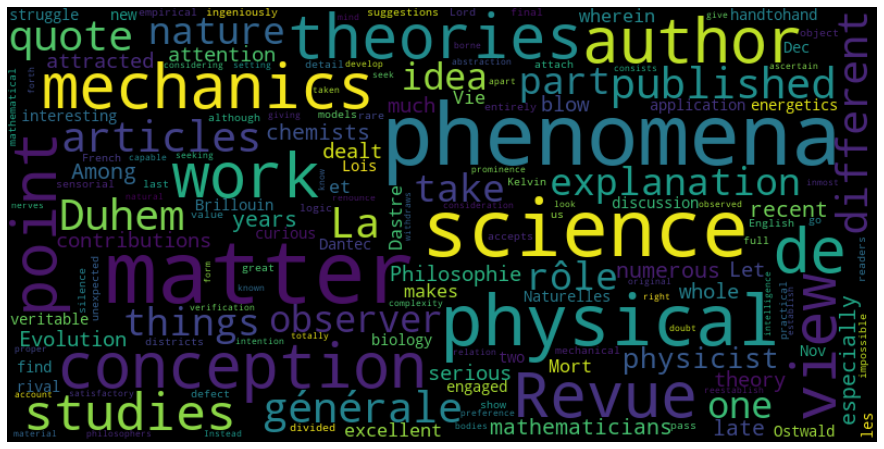

In [91]:
# https://medium.com/swlh/text-classification-using-tf-idf-7404e75565b8

from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sns

def generateWordCloud(corpus: str, cmap: str):
  """
  Return a Word Cloud object generated from the corpus and color map parameter.
  """
  wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                    colormap = cmap, max_words = 180, contour_width = 3,
                    max_font_size = 80, contour_color = 'steelblue',
                    random_state = 0)

  wordcloud.generate(str(remove_stopwords(read_article(text))))
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis("off")
  plt.show()

  return wordcloud

generateWordCloud(corpus = read_article(clean_text), cmap = 'viridis');

## KMeans Clustering

In [92]:
import pandas as pd

df = pd.DataFrame(clean_text.split('. '), columns=['Sentences'])
df

,Sentences
0,of late year numerous study have be publish on...
1,among these recent contribution to science i w...
2,"duhem 's view have attract much attention , an..."
3,let me also quote that excellent work of dastr...
4,"and last , it be impossible to pass over , in ..."
5,my object be not to go through these great stu...
6,it be the part of mathematical and physical ph...
7,this be the point of view they take up by pref...
8,the proper role of the natural science be to l...
9,"my own intention , in set forth these same the..."


In [93]:
# https://datascience.stackexchange.com/questions/24560/k-means-clustering-on-the-data-frame-having-only-one-column

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

X = TfidfVectorizer().fit_transform(df['Sentences'])

km = KMeans(n_clusters=4).fit(X)
df['labels'] = km.labels_.tolist()
df

,Sentences,labels
0,of late year numerous study have be publish on...,0
1,among these recent contribution to science i w...,3
2,"duhem 's view have attract much attention , an...",0
3,let me also quote that excellent work of dastr...,3
4,"and last , it be impossible to pass over , in ...",3
5,my object be not to go through these great stu...,2
6,it be the part of mathematical and physical ph...,1
7,this be the point of view they take up by pref...,1
8,the proper role of the natural science be to l...,1
9,"my own intention , in set forth these same the...",2


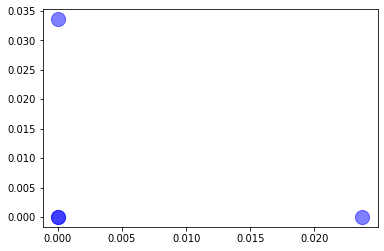

In [94]:
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


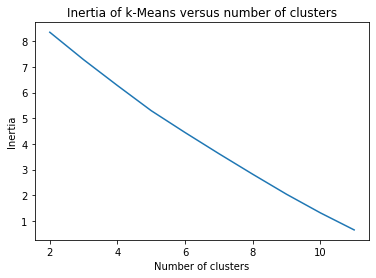

In [95]:
scores = [KMeans(n_clusters=i+2).fit(X).inertia_ 
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores);
plt.xlabel('Number of clusters');
plt.ylabel("Inertia");
plt.title("Inertia of k-Means versus number of clusters");